# Key Quantum Algorithms
Implement Deutsch-Jozsa, Grover's search, and Quantum Teleportation.

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

In [ ]:
## Deutsch-Jozsa Algorithm
For a constant function oracle.

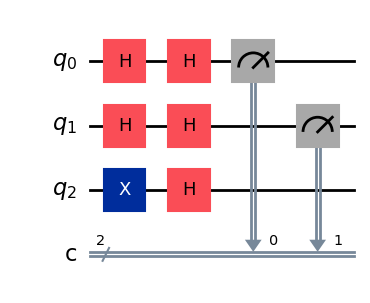

In [2]:
n = 2  # Number of qubits for input
qc_dj = QuantumCircuit(n+1, n)

# Initialize ancillary to |1>
qc_dj.x(n)
qc_dj.h(range(n+1))  # Hadamard on all

# Constant oracle (does nothing)
# For balanced, add CNOTs, but here constant

qc_dj.h(range(n))  # Hadamard again on input
qc_dj.measure(range(n), range(n))

qc_dj.draw('mpl')

In [3]:
simulator = AerSimulator()
compiled_dj = transpile(qc_dj, simulator)
result_dj = simulator.run(compiled_dj, shots=1).result()
counts_dj = result_dj.get_counts()
print(counts_dj)  # Should be all zeros for constant

{'00': 1}


## Grover's Search
Search for |11> in 4-item database.

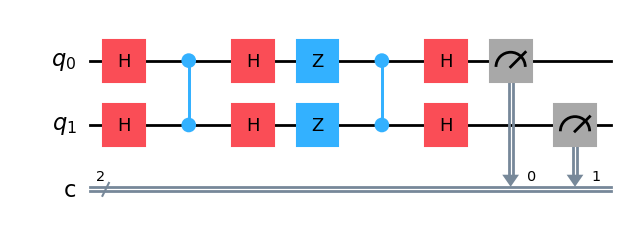

In [4]:
qc_grover = QuantumCircuit(2, 2)
qc_grover.h([0,1])  # Superposition

# Oracle for |11>
qc_grover.cz(0,1)

# Diffusion
qc_grover.h([0,1])
qc_grover.z([0,1])
qc_grover.cz(0,1)
qc_grover.h([0,1])

qc_grover.measure([0,1], [0,1])
qc_grover.draw('mpl')

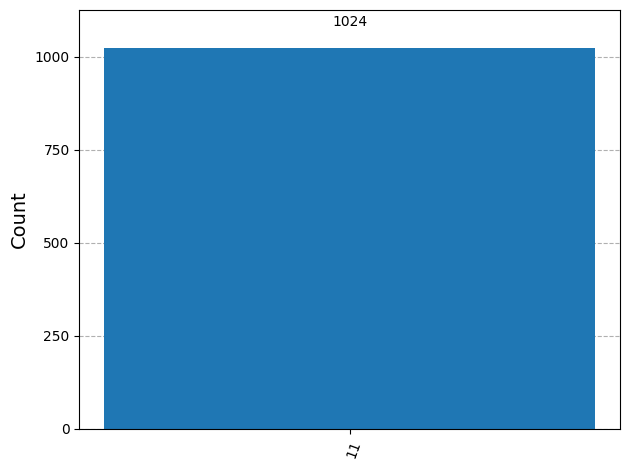

In [5]:
compiled_grover = transpile(qc_grover, simulator)
result_grover = simulator.run(compiled_grover, shots=1024).result()
counts_grover = result_grover.get_counts()
plot_histogram(counts_grover)

## Quantum Teleportation
Teleport state from Alice to Bob.

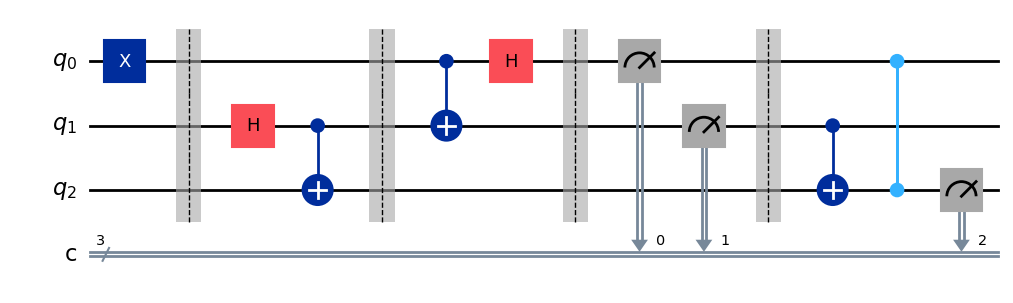

In [6]:
qc_tele = QuantumCircuit(3, 3)

# Prepare state to teleport (e.g., |1>)
qc_tele.x(0)
qc_tele.barrier()

# Create Bell pair
qc_tele.h(1)
qc_tele.cx(1,2)
qc_tele.barrier()

# Alice's operations
qc_tele.cx(0,1)
qc_tele.h(0)
qc_tele.barrier()

# Measurements
qc_tele.measure([0,1], [0,1])
qc_tele.barrier()

# Bob's corrections
qc_tele.cx(1,2)
qc_tele.cz(0,2)

qc_tele.measure(2,2)
qc_tele.draw('mpl')

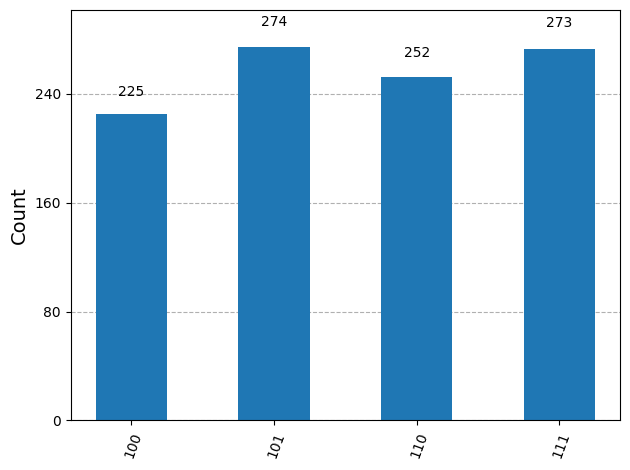

In [7]:
compiled_tele = transpile(qc_tele, simulator)
result_tele = simulator.run(compiled_tele, shots=1024).result()
counts_tele = result_tele.get_counts()
plot_histogram(counts_tele)  # Bob's bit (last) should be 1 mostly